In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("deliveries.csv")


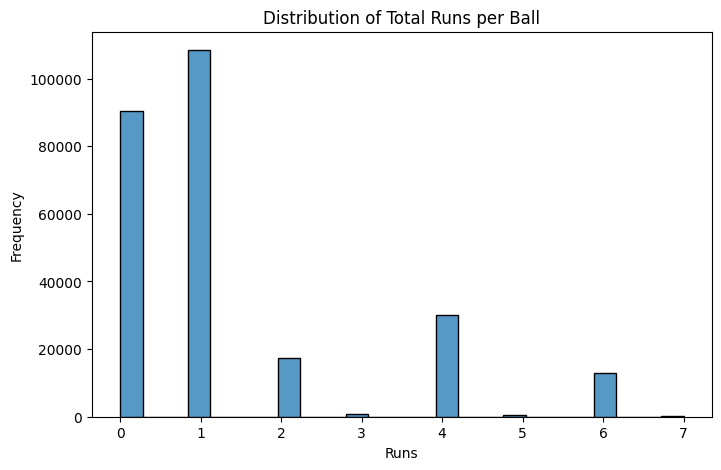

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df["total_runs"], bins=25)
plt.title("Distribution of Total Runs per Ball")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

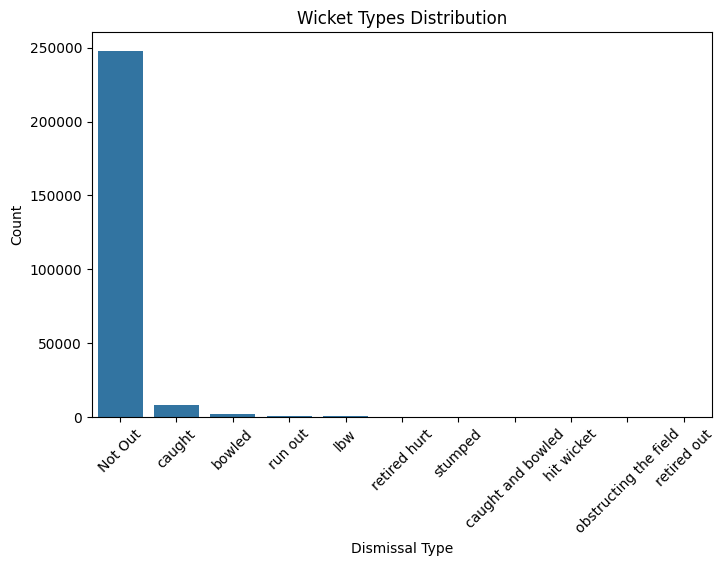

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["dismissal_kind"].fillna("Not Out"))
plt.xticks(rotation=45)
plt.title("Wicket Types Distribution")
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.show()

In [5]:
try:
    matches = pd.read_csv("matches.csv")

    merged = df.merge(matches[["id", "venue"]], left_on="match_id", right_on="id")

    venue_stats = merged.groupby("venue")["total_runs"].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,6))
    venue_stats.plot(kind="bar")
    plt.title("Top 10 High Scoring Venues")
    plt.xlabel("Venue")
    plt.ylabel("Total Runs Scored")
    plt.show()

except FileNotFoundError:
    print("matches.csv not found → Venue stats skipped!")


matches.csv not found → Venue stats skipped!


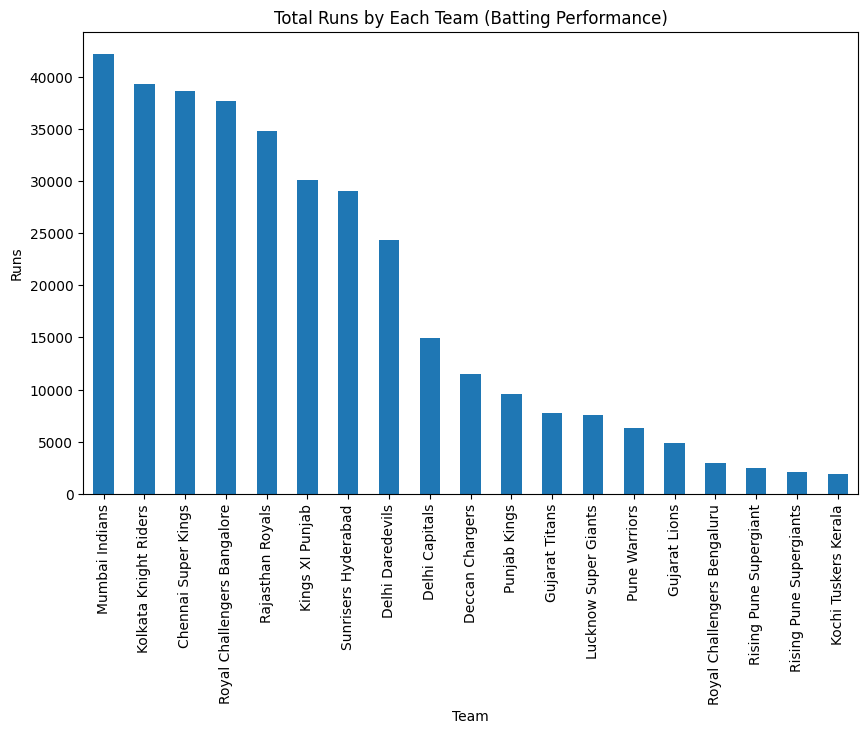

In [6]:
team_runs = df.groupby("batting_team")["total_runs"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
team_runs.plot(kind="bar")
plt.title("Total Runs by Each Team (Batting Performance)")
plt.xlabel("Team")
plt.ylabel("Runs")
plt.show()

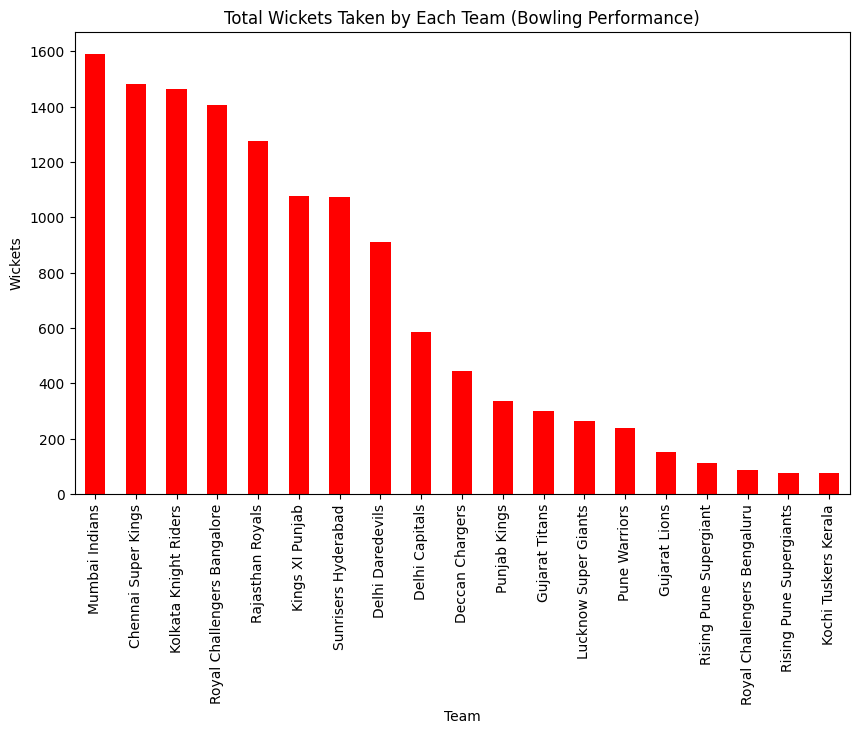

In [7]:
df["is_wicket"] = df["dismissal_kind"].notna().astype(int)

team_wickets = df.groupby("bowling_team")["is_wicket"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
team_wickets.plot(kind="bar", color="red")
plt.title("Total Wickets Taken by Each Team (Bowling Performance)")
plt.xlabel("Team")
plt.ylabel("Wickets")
plt.show()
